## PROJECT: WRANGLE AND ANALYZE DATA
##### BY: SAURABH KULKARNI

In [245]:
#Importing modules
import pandas as pd
import os
import numpy as np
import requests
import tweepy
import json
import ast
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Gather Data

#### Getting first piece of data

In [2]:
#Importing first piece of data: WeRateDogs Twitter Archive csv file into dataframe
df_tarch=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#Taking a look at df_tarch dataframe
df_tarch.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


#### Getting second piece of data

In [4]:
#Downloading and saving image predictions file programmatically using requests
url_file="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response=requests.get(url_file,allow_redirects=True)

#Writing response into a file and saving it
with open('image_predictions.tsv',mode='wb') as file:
    file.write(response.content)

#Importing saved file using pandas and saving into dataframe
df_imgpre=pd.read_csv('image_predictions.tsv',delimiter='\t')

In [5]:
#Taking a look at image prediction dataframe df_imgpre
df_imgpre.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


#### Getting third piece of data

In [6]:
#Creating twitter API object using tweepy
consumer_key=''
consumer_secret=''

access_token=''
access_secret=''

auth=tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)

api=tweepy.API(auth)

In [7]:
#Store all tweet IDs from WeRateDogs dataframe df_tarch 
tweet_ids=df_tarch.tweet_id.unique().tolist()

#Creating a list to store all the ids for which no status was found
missing_tweet_data=[]

for id in tweet_ids:
    print('{} IDs remaining'.format(len(tweet_ids)-tweet_ids.index(id)))
    try:
        tweet_data=api.get_status(id,tweet_mode='extended',wait_on_rate_limit=True,wait_on_rate_limit_notify=True)
        with open('tweet_json.txt','a+') as file:
            file.write('{}\n'.format(tweet_data._json))            
    except:
        missing_tweet_data.append(id)

In [8]:
#Save tweet ids of missing data 
np.savetxt(r'missing_tweet_ids.txt', missing_tweet_data)

In [9]:
#Read tweet_json text file line by line

tweet_data=[]

with open('tweet_json.txt','r') as file:
    for line in file:
        #Converting to dictionary
        data=ast.literal_eval(line[:-1])
        
        #Getting required information using key value pairs
        tweet_id=data['id']
        retweet_count=data['retweet_count']
        fav_count=data['favorite_count']
        
        #Appending data to tweet_id list 
        tweet_data.append({"tweet_id":tweet_id,
                          "retweet_count":retweet_count,
                          "favorite_count":fav_count})

#Converting list of dictionaries to dataframe
df_tweet_data=pd.DataFrame(tweet_data)


In [10]:
df_tweet_data.head(5)

,favorite_count,retweet_count,tweet_id
0,37994,8300,892420643555336193
1,32618,6127,892177421306343426
2,24558,4059,891815181378084864
3,41320,8441,891689557279858688
4,39505,9142,891327558926688256


## Assess Data 

In [11]:
#Taking a look at df_tarch from first piece of data
df_tarch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
#Taking a look at what df_tarch looks like
df_tarch.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [13]:
#Taking a look at what df_imgpre looks like 
df_imgpre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
#Taking a look at what df_imgpre looks like 
df_imgpre.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


### Observations for cleaning:

###### Quality Issues
- Missing values in df_imgpre. 2356 tweet ids in df_tarch and 2075 tweet ids in df_imgpre
- Data type for timestamp in df_tarch is not datetime (will be needed to filter out only tweets before August 1st 2017)
- Dog names might be incorrect in df_tarch
- Dog stage might be incorrect in df_tarch
- Rating numerator might not be correctly extracted in df_tarch
- Rating denominator might not be correctly extracted in df_tarch
- Not meaningful column headers in df_imgpre
- No consistency in dog names (lower and upper case) in df_imgpre


###### Tidyness issues

- Dog stages does not have a column (variables form a column violated)
- Timestamp has a mix of three values, month, date, time (each variable forms a column)
- Two tables for tweet data information, one is favorite count from API and other df_tarch



### Cleaning Data 

#### Making a copy of original dataframes for cleaning 

In [15]:
#Create copy of df_tarch
df_tarch_clean=df_tarch.copy()

#Create copy of df_imgpre
df_imgpre_clean=df_imgpre.copy()

#Create copy of df_tweet_data
df_tweet_data_clean=df_tweet_data.copy()

**QUALITY ISSUE 1**

<font color='red'> Missing values in df_imgpre. There are 2356 tweet ids in df_tarch and 2075 tweet ids in df_imgpre. </font>

##### *Define*

We have a twitter archive of 2356 tweets and image predictions of 2075 tweets. We will identify the tweet_ids without image data and flag them using a newly created column image_prediction having boolean value True or False. This will not be deleted as we might need it for analysis. 

- Get list of missing tweets between df_imgpre_clean and df_tarch_clean
- Create a new column image_prediction in df_tarch_clean
- Assign True or False depending on whether that tweet id is present in the list from step 1. 

##### Code

In [16]:
#Get list of missing tweet_ids in df_imgpre_clean
missing_img_tweetids=df_tarch_clean[~df_tarch_clean.tweet_id.isin(df_imgpre_clean.tweet_id)].tweet_id

In [17]:
#Create a new column image_prediction in df_tarch_clean, TRUE if prediction data is present
df_tarch_clean['image_prediction']=~df_tarch_clean.tweet_id.isin(missing_img_tweetids)

##### Test

In [18]:
#Using assert, we are checking if we get assertion error for an tweet ids in missing_img_tweetids
for tid in missing_img_tweetids:
    assert ~(df_tarch_clean[df_tarch_clean.tweet_id==tid]['image_prediction']).bool()

#### QUALITY ISSUE 2

<font color='red'>Data type for timestamp in df_tarch is not datetime (will be needed to filter out only tweets before August 1st 2017) </font>

##### Define

- Using pandas, change dtype of timestamp column in df_tarch_clean to datetime.
- Check if any timestamp exists beyond August 1, 2017

##### Code

In [19]:
#Convert dtype of timestamp column to datetime
df_tarch_clean.timestamp=pd.to_datetime(df_tarch_clean.timestamp)

In [20]:
#Check if any timestamp is beyond August 1, 2017
df_tarch_clean.query('timestamp>"08-01-2017"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,image_prediction
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,True
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,True


##### Test 

In [21]:
#Checking if dtype for timestamp was changed to datetime
df_tarch_clean.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
image_prediction                        bool
dtype: object

#### Quality Issue 3

Dog names might be incorrect in df_tarch_clean

##### Define

- Using regex extract name of dog
    - Dog name is followed by "This is" or "Meet"
- Create a new column regex_name and save these to this column
- Compare this new column to "name" column to see if there are any discrepancies
- If there are discrepancies, verify the text and drop "name" column
- Rename "regex_name" to "name" 
- To check this we will see if the number of columns with names has increased or not

##### Code

In [22]:
#Storing the number of columns with names 
names_number=df_tarch_clean[df_tarch_clean['name']!='None'].shape[0]

In [23]:
#Defining a function that will use regex to extract name of dog from tweet text
def get_dog_name(text):
    match=re.search(r'(?:This is|Meet|Say hello to|Here is|name is|named|pup is|names are|RIP)\s(\w+)',text)
    if match:
        return (match.group(1))
    else:
        return "None"

In [24]:
#Applying get_dog_name function defined above to tweet text column and creating a new column regex_name
df_tarch_clean['regex_name']=df_tarch_clean.text.apply(get_dog_name)

In [25]:
#Dropping name column, now that we have regex_name column created
df_tarch_clean=df_tarch_clean.drop('name',axis=1)

##### Test

In [26]:
#Check if "name" column has been removed
if 'name' in df_tarch_clean.columns:
    print('Yes')

In [27]:
#Check if we have increased the number of names found programmatically by regex than the original name column, Good if True returned
df_tarch_clean[df_tarch_clean.regex_name!='None'].shape[0]>names_number

True

##### Quality Issue 4 and Tidyness Issue 1
- Quality Issue: <font color='red'> Dog stage might be incorrect in df_tarch </font>
- Tidyness Issue: <font color='red'> Dog stage does not have a column, variables form a column violated </font>

In [28]:
#Getting number of identified dog stages for comparison
number_dog_stages=(df_tarch_clean[df_tarch_clean.puppo!='None'].shape[0])+(df_tarch_clean[df_tarch_clean.puppo!='None'].shape[0])+(df_tarch_clean[df_tarch_clean.floofer!='None'].shape[0])+(df_tarch_clean[df_tarch_clean.pupper!='None'].shape[0])

In [29]:
#Creating a new column dog_stage that will have dog stage information, taking care of tidyness issue
df_tarch_clean['dog_stage']=np.nan

In [30]:
#Defining a function that will find dog stage in tweet text
def get_dog_stage(stage_text):
    stage_match=re.search(r'(?:doggo|pupper|puppo|floof|floofer)',stage_text.lower())
    if stage_match:
        return (stage_match.group(0))
    else:
        return "None"

In [31]:
#Applying regex function get_dog_stage to 
df_tarch_clean['dog_stage']=df_tarch_clean.text.apply(get_dog_stage)

In [32]:
df_tarch_clean.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
image_prediction                        bool
regex_name                            object
dog_stage                             object
dtype: object

In [33]:
#Dropping doggo, floofer, pupper and puppo columns, we have a new column dog_stage now
df_tarch_clean=df_tarch_clean.drop(['doggo','floofer','pupper','puppo'],axis=1)

##### Test

In [34]:
#Check if columns have been dropped 
for item in ['doggo','floofer','pupper','puppo']:
    if item in df_tarch_clean.columns:
        print('Yes')

In [35]:
#Checking to see if we have more identified dog stages with improvement above, good if true. 
df_tarch_clean[df_tarch_clean['dog_stage']!="None"].shape[0]>number_dog_stages

True

##### Quality Issue 5

<font color='red'> Rating numerator might not be correctly extracted in df_tarch </font>

##### Define

- Extract numerator value from tweet text using regex
- Create new column with these numerator values
- Delete (Drop) old column rating_numerator

#### <font color=blue> Explanation of the function below get_numerator_rating </font>

**Objective: To extract numerator from ratings using 'text' column from df_tarch_clean and create new column for this data**

**STEPS:**

1) Checks if there are two ratings (with denominator 10) in tweet text using regex

2) If only one rating (out of 10) found, it extracts numerator and returns it

3) Else, it moves to the next loop which finds the number of ratings in the text that are NOT out of 10

4) If only ONE rating is present, it will extract numerator and return it. The reason we are extracting when only ONE rating is present is because tweets might contain strings like 24/7 or 50/50 which are not ratings. 

5) If all these conditions are not meet, "None" is returned. 

##### Code

In [36]:
#Define function that uses regex to extract numerator value from tweet text
def get_numerator_rating(text):
    
    #Checking if we have two ratings in the tweet, identified using '/10' 
    #Regex to match '10's in text
    match_10=re.findall(r'/(10)',text)
    #If we find only one 10 in the text
    if len([item for item in match_10 if '10' in item])==1:
        #Regex to find numerator
        match_numerator=re.search(r'(\d+)/(10)',text)
        #If match found, return the match
        if match_numerator:
            #Get numerator
            return match_numerator.group(1)
    else:
        #This loop is finding ratings that are NOT out of 10 but exist like 84/70 on row 433
        match_other=re.findall(r'(\d+)/(\d+)',text)
        #If only one rating is found in tweet text, we dont want to enter things like 24/7 or 50/50 which aren't ratings
        if len(match_other)==1:
            #Get numerator 
            return match_other[0][0]
        else:
            #No condition met, return "None"
            return "None"

In [37]:
#Applying defined function get_numerator_rating above to tweet text column and creating a new column
df_tarch_clean['regex_numerator_rating']=df_tarch_clean.text.apply(get_numerator_rating)

In [38]:
#Drop numerator column from original data
df_tarch_clean=df_tarch_clean.drop('rating_numerator',axis=1)

##### Note:

There are 26 rows that either have multiple ratings (for two dogs or same dog) or no ratings. These have been filled with "None" values. 

##### Test

In [39]:
#Checking number of rows with None
df_tarch_clean[df_tarch_clean['regex_numerator_rating']=='None'].shape[0]

26

In [40]:
#Visually checking random sample from df_tarch_clean to see if regex_numerator_rating is correct
df_tarch_clean[df_tarch_clean['regex_numerator_rating']!='None'][['text','regex_numerator_rating']].sample(10)

,text,regex_numerator_rating
1237,Reminder that we made our first set of sticker...,12
405,This is Cash. He's officially given pup on tod...,12
2250,THE EYES 12/10\n\nI'm sorry. These are suppose...,12
1705,This is Ellie. She's secretly ferocious. 12/10...,12
1220,Here are two lil cuddly puppers. Both 12/10 wo...,12
1721,This is Reggie. His Santa hat is a little big....,10
1854,Seriously guys?! Only send in dogs. I only rat...,11
68,RT @dog_rates: This is Emmy. She was adopted t...,14
643,Say hello to Lily. She's pupset that her costu...,12
1870,holy shit 12/10 https://t.co/p6O8X93bTQ,12


In [41]:
#Check if rating_numerator column has been dropped
if 'rating_numerator' in df_tarch_clean.columns:
    print('Yes column still exists')

##### Quality Issue 6
<font color='red'> Rating denominator might not be correctly extracted in df_tarch </font>

##### Define

This will be similar to what was done when extracting numerator from 'text' column.

**Explanation of the function get_denominator_rating below:**

1) Checks if there are two ratings (with denominator 10) in tweet text using regex

2) If only one rating (out of 10) found, '10' is denominator and that is returned.

3) Else, it moves to the next loop which finds the number of ratings in the text that are NOT out of 10

4) If only ONE rating is present, it will extract denominator and return it. The reason we are extracting when only ONE rating is present is because tweets might contain strings like 24/7 or 50/50 which are not ratings. 

5) If all these conditions are not meet, "None" is returned. 

##### Code

In [42]:
#Define function that uses regex to extract denominator value from tweet text
def get_denominator_rating(text):
    
    #Checking if we have two ratings in the tweet, identified using '/10' 
    #Regex to match '10's in text
    match_10=re.findall(r'/(10)',text)
    #If we find only one 10 in the text
    if len([item for item in match_10 if '10' in item])==1:
        #Rating is out of 10 so denominator is 10
        return "10"
    else:
        #This loop is finding ratings that are NOT out of 10 but exist like 84/70 on row 433
        match_other=re.findall(r'(\d+)/(\d+)',text)
        #If only one rating is found in tweet text, we dont want to enter things like 24/7 or 50/50 which aren't ratings
        if len(match_other)==1:
            #Get denominator 
            return match_other[0][1]
        else:
            #No condition met, return "None"
            return "None"

In [43]:
#Applying the above defined function to column 'text' to extract denominator from tweet text and creating new column
df_tarch_clean['regex_denominator_rating']=df_tarch_clean.text.apply(get_denominator_rating)

In [44]:
#Dropping original denominator column
df_tarch_clean=df_tarch_clean.drop('rating_denominator',axis=1)

##### Test

In [45]:
#Visually checking for denominators that are not 10
df_tarch_clean[df_tarch_clean['regex_denominator_rating']!='10'][['text','regex_denominator_rating']].sample(10)

,text,regex_denominator_rating
2010,10/10 for dog. 7/10 for cat. 12/10 for human. ...,None
1120,Say hello to this unbelievably well behaved sq...,170
1634,"Two sneaky puppers were not initially seen, mo...",130
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,7
1465,Meet Oliviér. He takes killer selfies. Has a d...,None
1274,"From left to right:\nCletus, Jerome, Alejandro...",50
1459,This may be the greatest video I've ever been ...,None
2064,Meet Holly. She's trying to teach small human-...,None
1635,Someone help the girl is being mugged. Several...,110
1538,Meet Fynn &amp; Taco. Fynn is an all-powerful ...,None


In [46]:
#Visually checking for denominators that are 10
df_tarch_clean[df_tarch_clean['regex_denominator_rating']=='10'][['text','regex_denominator_rating']].sample(10)

,text,regex_denominator_rating
1498,Meet Herschel. He's slightly bigger than ur av...,10
2066,This is a Helvetica Listerine named Rufus. Thi...,10
21,This is Jeffrey. He has a monopoly on the pool...,10
363,This is Astrid. She's a guide doggo in trainin...,10
1670,This is Patrick. He's a bigass pupper. 7/10 ht...,10
2136,This is Tommy. He's a cool dog. Hard not to st...,10
351,This is Pete. He has no eyes. Needs a guide do...,10
458,Looks like he went cross-eyed trying way too h...,10
2151,Meet Louie. He just pounded that bottle of win...,10
249,This is Pickles. She's a silly pupper. Thinks ...,10


In [47]:
#Checking if original denominator column was dropped
if 'rating_denominator' in df_tarch_clean.columns:
    print('Yes, column still exists')

##### Note:

There are 26 rows that either have multiple ratings (for two dogs or same dog) or no ratings. These have been filled with "None" values. 

In [48]:
#Changing new column names to make them more meaningful
df_tarch_clean=df_tarch_clean.rename(columns={'regex_name':'dog_name',
                                             'regex_numerator_rating':'rating_numerator',
                                             'regex_denominator_rating':'rating_denominator'})

In [49]:
#Checking if columns renamed
df_tarch_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'image_prediction',
       'dog_name', 'dog_stage', 'rating_numerator', 'rating_denominator'],
      dtype='object')

##### Quality Issue 7

<font color='red'> Not meaningful column headers in df_imgpre </font>

##### Define

Using df.rename, change column names to something more meaningful

##### Code

In [50]:
#Renaming columns to make it more meaningful
df_imgpre_clean=df_imgpre_clean.rename(columns={'tweet_id':'tweet_id',
                               'jpg_url':'image_url',
                               'img_num':'image_number',
                               'p1':'predict_no_1',
                               'p1_conf':'confidence_no_1',
                               'p1_dog':'if_dog_predict1',
                               'p2':'predict_no_2',
                               'p2_conf':'confidence_no_2',
                               'p2_dog':'if_dog_predict2',
                               'p3':'predict_no_3',
                               'p3_conf':'confidence_no_3',
                               'p3_dog':'if_dog_predict3'})

##### Test

In [51]:
#Checking if columns renamed
df_imgpre_clean.head(3)

,tweet_id,image_url,image_number,predict_no_1,confidence_no_1,if_dog_predict1,predict_no_2,confidence_no_2,if_dog_predict2,predict_no_3,confidence_no_3,if_dog_predict3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


##### Quality Issue 8
<font color='red'> No consistency in dog names (lower and upper case) in df_imgpre </font>


##### Define

- Change predict_no_1 to lower case
- Change predict_no_2 to lower case
- Change predict_no_3 to lower case

##### Code

In [52]:
df_imgpre_clean.dtypes

tweet_id             int64
image_url           object
image_number         int64
predict_no_1        object
confidence_no_1    float64
if_dog_predict1       bool
predict_no_2        object
confidence_no_2    float64
if_dog_predict2       bool
predict_no_3        object
confidence_no_3    float64
if_dog_predict3       bool
dtype: object

In [53]:
#Changing to lower case
df_imgpre_clean.predict_no_1=df_imgpre_clean.predict_no_1.map(lambda s:s.lower())

In [54]:
#Changing to lower case
df_imgpre_clean.predict_no_2=df_imgpre_clean.predict_no_2.map(lambda s:s.lower())

In [55]:
#Changing to lower case
df_imgpre_clean.predict_no_3=df_imgpre_clean.predict_no_3.map(lambda s:s.lower())

##### Test

In [56]:
#Check to see any upper case exists
df_imgpre_clean[['predict_no_1','predict_no_2','predict_no_3']].sample(10)

,predict_no_1,predict_no_2,predict_no_3
604,llama,ram,chow
1443,web_site,hand-held_computer,menu
1176,pembroke,cardigan,chihuahua
1561,afghan_hound,borzoi,doormat
418,toy_poodle,miniature_poodle,maltese_dog
96,ibex,bighorn,ram
1016,bib,handkerchief,umbrella
395,wombat,corn,pug
581,pembroke,toy_poodle,pomeranian
1862,tub,bucket,labrador_retriever


##### Tidyness Issue 2
<font color='red'> Timestamp has a mix of three values, month, date, time (each variable forms a column) </font>

##### Define

Split timestamp column into four columns
- Year
- Month
- Date
- Time

##### Code

In [57]:
# Extracting year from timestamp column and creating a new year column
df_tarch_clean['year']=df_tarch_clean.timestamp.map(lambda x:x.year)

In [58]:
#Extracting month from timestamp column and creating a new month column
df_tarch_clean['month']=df_tarch_clean.timestamp.map(lambda x:x.month)

In [59]:
#Extracting day from timestamp column and creating a new day column
df_tarch_clean['day']=df_tarch_clean.timestamp.map(lambda x:x.day)

In [60]:
#Extracting time in H:M:S format and creating a new time column
df_tarch_clean['time']=df_tarch_clean.timestamp.map(lambda x:x.time())

##### Test

In [61]:
#Checking visually if timestamp values match
df_tarch_clean[['timestamp','time','year','month','day']].sample(20)

,timestamp,time,year,month,day
1506,2016-01-25 22:58:05,22:58:05,2016,1,25
363,2017-02-08 17:00:26,17:00:26,2017,2,8
388,2017-02-01 01:09:42,01:09:42,2017,2,1
1273,2016-03-14 02:39:42,02:39:42,2016,3,14
1992,2015-12-04 03:13:46,03:13:46,2015,12,4
1620,2016-01-07 03:30:07,03:30:07,2016,1,7
503,2016-12-25 17:00:08,17:00:08,2016,12,25
873,2016-08-04 22:52:29,22:52:29,2016,8,4
435,2017-01-15 01:45:15,01:45:15,2017,1,15
2102,2015-11-28 19:04:19,19:04:19,2015,11,28


In [62]:
#Dropping timestamp column
df_tarch_clean=df_tarch_clean.drop('timestamp',axis=1)

In [63]:
#Checking if timestamp column dropped
if 'timestamp' in df_tarch_clean.columns:
    print('Yes, column still exists')

##### Tidyness Issue 3
<font color='red'> Two tables for tweet data information, one is favorite count from API and other df_tarch </font>

##### Define
Merge df_tarch_clean and df_tweet_data on tweet_id

In [64]:
df_tarch_clean.shape

(2356, 18)

In [65]:
df_tweet_data.shape

(2340, 3)

##### Code

In [66]:
#Merging two dataframes based on intersection of tweet_id columns, saving merged dataframe to df_tweets
df_tweets=pd.merge(df_tarch_clean,df_tweet_data,on='tweet_id')

##### Test

In [67]:
#Checking if shape of new dataframe matches merged dataframe shape, number of columns must be 20 and rows 2340
df_tweet_data.shape[0]==df_tweets.shape[0]

True

In [68]:
#Checking if number of columns is 20
df_tweet_data.shape[1]+df_tarch_clean.shape[1]-1==df_tweets.shape[1]

True

### Saving master tweets data file in csv format

In [69]:
#Saving the master twitter archive file
df_tweets.to_csv('twitter_archive_master.csv',index=False)

In [70]:
#Saving image processing file
df_imgpre_clean.to_csv('image_predictions.csv',index=False)

## Insights and Visualization

In [71]:
df_tweets.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,image_prediction,dog_name,dog_stage,rating_numerator,rating_denominator,year,month,day,time,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,True,Phineas,None,13,10,2017,8,1,16:23:56,37994,8300
1,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,True,Tilly,None,13,10,2017,8,1,00:17:27,32618,6127
2,891815181378084864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,True,Archie,None,12,10,2017,7,31,00:18:03,24558,4059


In [72]:
df_imgpre_clean.head(3)

,tweet_id,image_url,image_number,predict_no_1,confidence_no_1,if_dog_predict1,predict_no_2,confidence_no_2,if_dog_predict2,predict_no_3,confidence_no_3,if_dog_predict3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


### <font color='blue'> Dog stage popularity: Which dog stage is more popular? </font>

In [73]:
#Grouping by dog stages and getting sum of favorites for each stage, NONE has been filtered out
dog_stage_favorite=df_tweets.query('dog_stage!="None"').groupby('dog_stage').favorite_count.sum()

In [74]:
#Sorting by descending order
dog_stage_favorite=dog_stage_favorite.sort_values(ascending=False)

In [75]:
dog_stage_favorite

dog_stage
pupper    1730589
doggo     1501511
puppo      685077
floof      308302
Name: favorite_count, dtype: int64

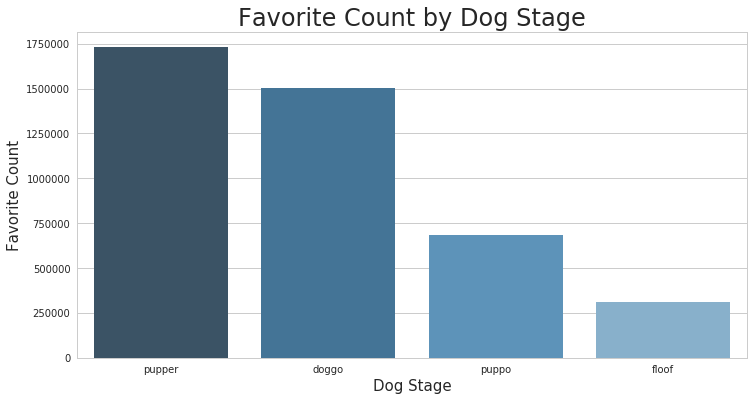

In [76]:
#Visualizing using bar chart

sns.set(style='whitegrid')

#Set figure size
plt.figure(figsize=(12,6))

#Plot series dog_stage_favorite
ax=sns.barplot(x=dog_stage_favorite.index,y=dog_stage_favorite.values,palette='Blues_d')

#Increase plot font size
sns.set(font_scale=2)

#Specify plot title
plt.title('Favorite Count by Dog Stage')

#Set X and Y labels
ax.set_xlabel('Dog Stage',fontsize=15)
ax.set_ylabel('Favorite Count',fontsize=15);

In [77]:
#Grouping by dog stages and getting a sum of retweets for each dog stage
dog_stage_retweets=df_tweets.query('dog_stage!="None"').groupby('dog_stage').retweet_count.sum()

In [78]:
#Sorting by descending order
dog_stage_retweets=dog_stage_retweets.sort_values(ascending=False)

In [79]:
dog_stage_retweets

dog_stage
pupper    689366
doggo     628729
puppo     220720
floof     100871
Name: retweet_count, dtype: int64

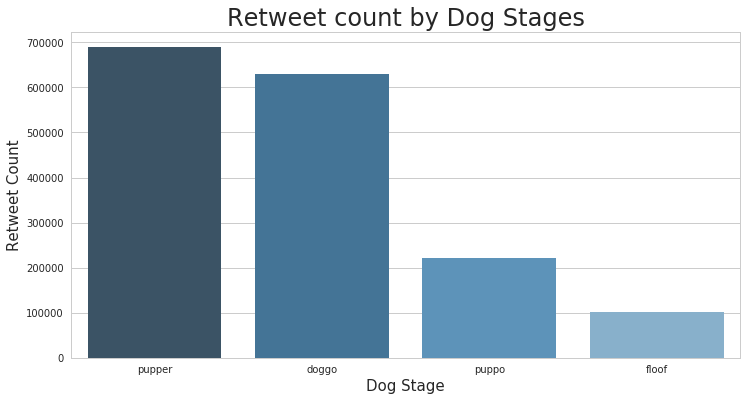

In [80]:
#Visualization using bar chart

sns.set(style='whitegrid')

#Set figure size
plt.figure(figsize=(12,6))

#Plot series dog_stage_retweets
ax1=sns.barplot(x=dog_stage_retweets.index,y=dog_stage_retweets.values,palette='Blues_d')

#Increase font size
sns.set(font_scale=2)

#Specify plot title
plt.title('Retweet count by Dog Stages')

#Set X and Y labels 
ax1.set_xlabel('Dog Stage',fontsize=15)
ax1.set_ylabel('Retweet Count',fontsize=15);

**<font size =4> The charts above show that pupper dog stage has been more popular in terms of retweets and favorite counts closely followed by doggo. Floof got the lowest retweet and favorite counts.** </font>

### <font color='blue'> Which breed is the most popular? </font>

For this we first need to grab breed prediction for df_imgpre_clean (best prediction based on confidence) and corresponding favorite and retweet counts.

- Create a new dataframe df_imgpre_breed that contains best prediction of dog breed based on confidence and corresponding tweet ids
- Merge that dataframe with df_tweets 
- Groupby breed and get favorite count and retweet count 
- Plot bar charts

In [133]:
#Creating a new dataframe for this analysis
df_imgpre_breed=df_imgpre_clean.copy()

In [134]:
#Creating a new column new_confidence_1 which will be zero if prediction is not a dog, else it will be the prediction confidence value

df_imgpre_breed['new_confidence_1']=np.where(df_imgpre_breed['if_dog_predict1']==True,df_imgpre_breed['confidence_no_1'],0)

In [135]:
#Creating a new column new_confidence_2 which will be zero if prediction is not a dog, else it will be the prediction confidence value

df_imgpre_breed['new_confidence_2']=np.where(df_imgpre_breed['if_dog_predict2']==True,df_imgpre_breed['confidence_no_2'],0)

In [136]:
#Creating a new column new_confidence_3 which will be zero if prediction is not a dog, else it will be the prediction confidence value

df_imgpre_breed['new_confidence_3']=np.where(df_imgpre_breed['if_dog_predict3']==True,df_imgpre_breed['confidence_no_3'],0)

In [137]:
#Dropping unnecessary columns
df_imgpre_breed=df_imgpre_breed.drop(['image_url','image_number','confidence_no_1','confidence_no_2','confidence_no_3','if_dog_predict1','if_dog_predict2','if_dog_predict3'],axis=1)

In [138]:
#Creating a max column that has the name of the confidence column that has maximum value
df_imgpre_breed['max_confidence']=df_imgpre_breed[['new_confidence_1','new_confidence_2','new_confidence_3']].idxmax(axis=1)

In [139]:
#Creating an empty "breed" column that will have breed information
df_imgpre_breed['breed']=np.nan

In [141]:
#Creating a new dictionary that has corresponding confidence to predict column names, example confidence_1 corresponds to predict_1
breed_confidence={'new_confidence_1':'predict_no_1',
                 'new_confidence_2':'predict_no_2',
                 'new_confidence_3':'predict_no_3'}

##### What does the loop below do?

- It iterates over all rows using itertuples (used to get index)
- It gets value in the current row (from itertuples) and column "max_confidence" 
- From the dictionary breed_confidence it gets the value for the value retreived in step 2
- Using this value (from .get), it gets the current row's predicted breed 

**Example of how this happens:**

1- The current row is 0 (using .itertuples loop)

2- It gets the value of row 0 in column "max_confidence" which is "new_confidence_1"

3- Using .get, it retrieves the corresponding "value" from dictionary breed_confidence defined in the above cell

4- Since the value from step 2 is "new_confidence_1", the corresponding value is "predict_no_1"

5- This value obtained is matched with current row (which is 0) and column "predict_no_1" to get breed

6- This breed value is saved in current row (which is 0) and "breed" column (which is column 8) 


In [144]:
for row in df_imgpre_breed.itertuples():
    print('On {}th row'.format(row.Index))
    df_imgpre_breed.iloc[row.Index,8]=df_imgpre_breed.iloc[row.Index,][breed_confidence.get(df_imgpre_breed.iloc[row.Index,7])]

On 0th row
On 1th row
On 2th row
On 3th row
On 4th row
On 5th row
On 6th row
On 7th row
On 8th row
On 9th row
On 10th row
On 11th row
On 12th row
On 13th row
On 14th row
On 15th row
On 16th row
On 17th row
On 18th row
On 19th row
On 20th row
On 21th row
On 22th row
On 23th row
On 24th row
On 25th row
On 26th row
On 27th row
On 28th row
On 29th row
On 30th row
On 31th row
On 32th row
On 33th row
On 34th row
On 35th row
On 36th row
On 37th row
On 38th row
On 39th row
On 40th row
On 41th row
On 42th row
On 43th row
On 44th row
On 45th row
On 46th row
On 47th row
On 48th row
On 49th row
On 50th row
On 51th row
On 52th row
On 53th row
On 54th row
On 55th row
On 56th row
On 57th row
On 58th row
On 59th row
On 60th row
On 61th row
On 62th row
On 63th row
On 64th row
On 65th row
On 66th row
On 67th row
On 68th row
On 69th row
On 70th row
On 71th row
On 72th row
On 73th row
On 74th row
On 75th row
On 76th row
On 77th row
On 78th row
On 79th row
On 80th row
On 81th row
On 82th row
On 83th row
On

On 773th row
On 774th row
On 775th row
On 776th row
On 777th row
On 778th row
On 779th row
On 780th row
On 781th row
On 782th row
On 783th row
On 784th row
On 785th row
On 786th row
On 787th row
On 788th row
On 789th row
On 790th row
On 791th row
On 792th row
On 793th row
On 794th row
On 795th row
On 796th row
On 797th row
On 798th row
On 799th row
On 800th row
On 801th row
On 802th row
On 803th row
On 804th row
On 805th row
On 806th row
On 807th row
On 808th row
On 809th row
On 810th row
On 811th row
On 812th row
On 813th row
On 814th row
On 815th row
On 816th row
On 817th row
On 818th row
On 819th row
On 820th row
On 821th row
On 822th row
On 823th row
On 824th row
On 825th row
On 826th row
On 827th row
On 828th row
On 829th row
On 830th row
On 831th row
On 832th row
On 833th row
On 834th row
On 835th row
On 836th row
On 837th row
On 838th row
On 839th row
On 840th row
On 841th row
On 842th row
On 843th row
On 844th row
On 845th row
On 846th row
On 847th row
On 848th row
On 849th row

On 1545th row
On 1546th row
On 1547th row
On 1548th row
On 1549th row
On 1550th row
On 1551th row
On 1552th row
On 1553th row
On 1554th row
On 1555th row
On 1556th row
On 1557th row
On 1558th row
On 1559th row
On 1560th row
On 1561th row
On 1562th row
On 1563th row
On 1564th row
On 1565th row
On 1566th row
On 1567th row
On 1568th row
On 1569th row
On 1570th row
On 1571th row
On 1572th row
On 1573th row
On 1574th row
On 1575th row
On 1576th row
On 1577th row
On 1578th row
On 1579th row
On 1580th row
On 1581th row
On 1582th row
On 1583th row
On 1584th row
On 1585th row
On 1586th row
On 1587th row
On 1588th row
On 1589th row
On 1590th row
On 1591th row
On 1592th row
On 1593th row
On 1594th row
On 1595th row
On 1596th row
On 1597th row
On 1598th row
On 1599th row
On 1600th row
On 1601th row
On 1602th row
On 1603th row
On 1604th row
On 1605th row
On 1606th row
On 1607th row
On 1608th row
On 1609th row
On 1610th row
On 1611th row
On 1612th row
On 1613th row
On 1614th row
On 1615th row
On 161

In [159]:
#Some predictions have no dogs in them, we need to set breeds for these as "None"
df_imgpre_breed.breed.loc[(df_imgpre_breed.new_confidence_1==0)&(df_imgpre_breed.new_confidence_2==0)&(df_imgpre_breed.new_confidence_3==0)]="None"

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [161]:
#Merge df_imgpre_breed with df_tweets to get corresponding breed for every tweet id and save in new df df_breed_tweets

df_breed_tweets=pd.merge(df_tweets,df_imgpre_breed[['tweet_id','breed']],on='tweet_id')


In [185]:
#Grouping by breed and getting sum of favorites for each breed, NONE has been filtered out
breed_favorite=df_breed_tweets.query('breed!="None"').groupby('breed').favorite_count.sum()


In [188]:
#Sorting by descending order
breed_favorite=breed_favorite.sort_values(ascending=False)

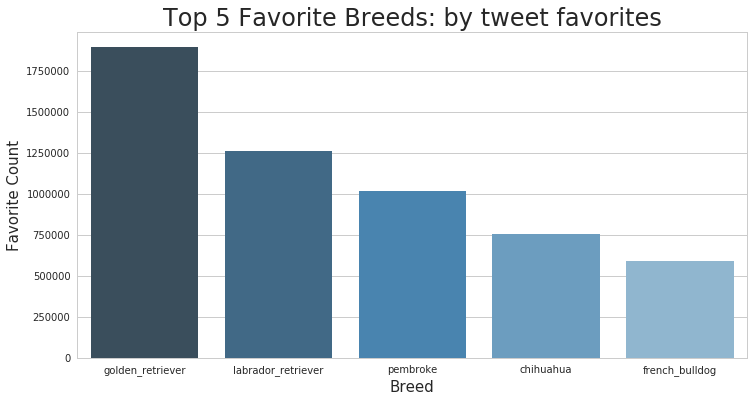

In [189]:
#Plotting the top five values only
#Visualization using bar chart

sns.set(style='whitegrid')

#Set figure size
plt.figure(figsize=(12,6))

#Plot series breed_favorite
ax2=sns.barplot(x=breed_favorite[:5].index,y=breed_favorite[:5].values,palette="Blues_d")

#Increase font size
sns.set(font_scale=2)

#Specify plot title
plt.title('Top 5 Favorite Breeds: by tweet favorites')

#Set X and Y labels
ax2.set_xlabel('Breed',fontsize=15)
ax2.set_ylabel('Favorite Count',fontsize=15);

In [190]:
#Grouping by breed and getting sum of retweets for each breed, NONE has been filtered out
breed_retweet=df_breed_tweets.query('breed!="None"').groupby('breed').retweet_count.sum()

In [191]:
#Sorting series breed_retweet by descending order
breed_retweet=breed_retweet.sort_values(ascending=False)

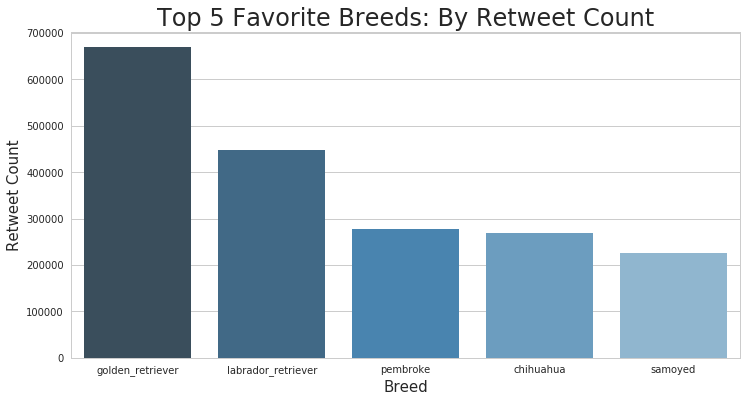

In [194]:
#Plotting the same chart using retweets

sns.set(style='whitegrid')

#Set figure size
plt.figure(figsize=(12,6))

#Plot series breed_retweet
ax3=sns.barplot(x=breed_retweet[:5].index,y=breed_retweet[:5].values,palette="Blues_d")

#Setting X and Y axis labels
ax3.set_xlabel('Breed',fontsize=15)
ax3.set_ylabel('Retweet Count',fontsize=15)

#Set plot scale
sns.set(font_scale=2)

#Specify plot title 
plt.title('Top 5 Favorite Breeds: By Retweet Count');

**<font size =4> The charts above show that Golden Retriever is the most popular breed according to retweet and favorite counts.** </font>

### <font color='blue'> Which breed got the highest ratings?</font>

Here we want to know which breed got the best ratings. We can use the same dataframe df_breed_tweets since it has all the data we need. We will use a bar chart to show the top three breeds with highest ratings. 

**SCALE OF RATINGS**

- When we were cleaning data, we found that there were some ratings that were not given out of 10 (like 87/90).
- We will ignore these ratings for this analysis.
- To do that, we will filter out only those rows which have denominator "10".
- We will then calculate the ratings for every breed and determine which top 3 breeds got the highest rating

In [196]:
df_breed_tweets.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,image_prediction,...,dog_stage,rating_numerator,rating_denominator,year,month,day,time,favorite_count,retweet_count,breed
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,True,...,None,13,10,2017,8,1,16:23:56,37994,8300,None


In [239]:
#Filter only ratings with 10 as denominator and filter all "None" in rating_numerator column
df_breed_ratings=df_breed_tweets.query('(rating_denominator=="10")&(rating_numerator!="None")&(breed!="None")')

In [240]:
#Convert rating_numerator to integer for calculations
df_breed_ratings.rating_numerator=df_breed_ratings.rating_numerator.apply(pd.to_numeric)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [241]:
#Group dataframe by breed and get ratings for each breed save in a series breed_ratings
breed_ratings=df_breed_ratings.groupby('breed').rating_numerator.sum()

In [242]:
#Sort by descending order
breed_ratings=breed_ratings.sort_values(ascending=False)

In [243]:
breed_ratings

breed
golden_retriever                  1963
labrador_retriever                1221
pembroke                          1074
chihuahua                          965
pug                                670
toy_poodle                         575
chow                               572
samoyed                            529
pomeranian                         504
malamute                           370
cocker_spaniel                     353
french_bulldog                     335
chesapeake_bay_retriever           315
miniature_pinscher                 262
cardigan                           257
eskimo_dog                         251
staffordshire_bullterrier          239
german_shepherd                    231
siberian_husky                     226
kuvasz                             221
beagle                             215
rottweiler                         211
shih-tzu                           207
shetland_sheepdog                  200
lakeland_terrier                   193
maltese_dog        

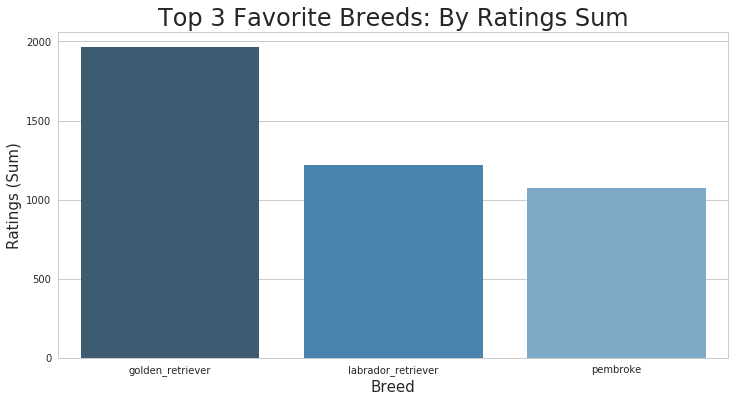

In [244]:
#Plotting top three chart for breeds with highest ratings

sns.set(style='whitegrid')

#Set figure size
plt.figure(figsize=(12,6))

#Plot series breed_retweet
ax3=sns.barplot(x=breed_ratings[:3].index,y=breed_ratings[:3].values,palette="Blues_d")

#Setting X and Y axis labels
ax3.set_xlabel('Breed',fontsize=15)
ax3.set_ylabel('Ratings (Sum)',fontsize=15)

#Set plot scale
sns.set(font_scale=2)

#Specify plot title 
plt.title('Top 3 Favorite Breeds: By Ratings Sum');

**<font size =4> According to the chart above, Golden Retriever is the most popular breed.It goe the highest ratings as compared to other breeds.** </font>